### Brute Force

A Hamiltonian path (or traceable path) is a path in an undirected or directed graph that visits each vertex exactly once. A Hamiltonian cycle (or Hamiltonian circuit) is a cycle that visits each vertex exactly once. A Hamiltonian path that starts and ends at adjacent vertices can be completed by adding one more edge to form a Hamiltonian cycle and removing any edge from a Hamiltonian cycle produces a Hamiltonian path.
(https://en.wikipedia.org/wiki/Hamiltonian_path)

#### Write a program to
1. Determine whether a given graph has a path from given u to given v or not ($Path(u,v)$). If there is a path, print that path.
2. Check whether a given graph has a Hamiltonian path/cycle. If there is a path/cycle, print that path/cycle.

    **Please note that Information will be provided by various sizes of adjacency Matrix**

---

### Draw graph zone

In [100]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(matrix):
    G = nx.DiGraph()
    # Add nodes to the graph
    for i in range(len(matrix)):
        G.add_node(i)  # Adding nodes irrespective of their connections
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] == 1:
                G.add_edge(i, j)
    pos = nx.shell_layout(G)
    plt.figure(figsize=(2,2))  
    nx.draw(G, pos,with_labels=True, node_color='skyblue', node_size=200, font_size=10)
    plt.show()

def draw_solution(matrix, paths, cycles=False):
    """
    Visualize a graph represented by an adjacency matrix and highlight multiple paths (show all paths)
    
    Parameters:
    - matrix (List[List[int]]): Adjacency matrix representing the graph.
                                 An entry of 1 at matrix[i][j] indicates an edge from node i to node j.
    - paths (List[List[int]]): List of paths, where each path is a list of nodes to be highlighted.
    """
    G = nx.DiGraph()
    # Add nodes to the graph
    for i in range(len(matrix)):
        G.add_node(i)  # Adding nodes irrespective of their connections
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] == 1:
                G.add_edge(i, j)
    pos = nx.shell_layout(G)
    for path in paths:
        plt.figure(figsize=(2,2)) 
        # Draw the entire graph in a light color
        nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=200, font_size=10, edge_color='lightgray')
        # Highlight the solution path
        edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        if cycles:  # Check if the first and last nodes are connected
            edges.append((path[-1], path[0]))  # Add the edge to close the cycle
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2)
        plt.show()

def draw_current_path(matrix, path):
    """
    Visualize a graph represented by an adjacency matrix and highlight a single path.
    
    Parameters:
    - matrix (List[List[int]]): Adjacency matrix representing the graph.
                                 An entry of 1 at matrix[i][j] indicates an edge from node i to node j.
    - path (List[int]): Path of nodes to be highlighted.
    """
    G = nx.DiGraph()
    # Add nodes to the graph
    for i in range(len(matrix)):
        G.add_node(i)  # Adding nodes irrespective of their connections
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] == 1:
                G.add_edge(i, j)
    pos = nx.shell_layout(G)
    plt.figure(figsize=(2,2))
    # Draw the entire graph in light colors
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=200, font_size=10, edge_color='lightgray')
    # Highlight the current path
    edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2)
    plt.draw()
    plt.pause(1)  # Pause to observe the drawing

----

## CODE

#### Find Path given u and v

In [101]:
def generate_all_trails(matrix, node, visited):
    n = len(matrix)
    trails = [[node]]

    for next_node in range(n):
        if matrix[node][next_node] == 1 and next_node not in visited:
            visited.add(next_node)
            for trail in generate_all_trails(matrix, next_node, visited):
                trails.append([node] + trail)
            visited.remove(next_node)
    return trails

def find_all_paths_V2(matrix, start, end):
    visited = set([start])
    all_trails = generate_all_trails(matrix, start, visited)
    valid_paths = [trail for trail in all_trails if trail[-1] == end]
    return valid_paths

#### Hamiltonian paths

In [102]:
def find_hamiltonian_paths_from_vertex(matrix, start):
    n = len(matrix)
    visited = set([start])
    all_trails = generate_all_trails(matrix, start, visited)

    # Filtering trails to get Hamiltonian paths
    hamiltonian_paths = [trail for trail in all_trails if len(trail) == n]
    
    return hamiltonian_paths

def find_hamiltonian_paths_V2(matrix):
    n = len(matrix)
    all_paths = []
    
    for start_vertex in range(n):
        all_paths.extend(find_hamiltonian_paths_from_vertex(matrix, start_vertex))
    
    return all_paths


#### Hamiltonian cycles

In [103]:
def find_hamiltonian_cycles_from_vertex(matrix, start):
    n = len(matrix)
    visited = set([start])
    all_trails = generate_all_trails(matrix, start, visited)

    # Filtering trails to get Hamiltonian paths
    hamiltonian_paths = [trail for trail in all_trails if len(trail) == n]
    # Filtering Hamiltonian paths to get Hamiltonian cycles
    hamiltonian_cycles = [path for path in hamiltonian_paths if matrix[path[-1]][start] == 1]

    return hamiltonian_cycles

def find_hamiltonian_cycles_V2(matrix):
    n = len(matrix)
    all_cycles = []
    
    for start_vertex in range(n):
        all_cycles.extend(find_hamiltonian_cycles_from_vertex(matrix, start_vertex))
    
    return all_cycles

---

### Test program

In [104]:
def read_adjacency_matrix(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        matrix = [list(map(int, line.strip().split())) for line in lines]
    return matrix

# Using the function:
filename = "Example_LAB2.txt"
graph_matrix = read_adjacency_matrix(filename)


In [105]:
def canonical_representation(cycle):
    # Rotate to smallest element's position
    min_index = cycle.index(min(cycle))
    rotated_cw = cycle[min_index:] + cycle[:min_index]
    # Counterclockwise rotation
    rotated_ccw = list(reversed(cycle[-min_index:] + cycle[:-min_index]))
    # Return the lexicographically smaller representation (CW or CCW)
    return min(rotated_cw, rotated_ccw)


def filter_unique_cycles(all_cycles):
    unique_cycles_set = set(tuple(canonical_representation(cycle)) for cycle in all_cycles)
    return [list(cycle) for cycle in unique_cycles_set]

def canonical_representation_path(path):
    # Reverse path if its end vertex is smaller than its start vertex
    return min(path, list(reversed(path)))

def filter_unique_paths(all_paths):
    unique_paths_set = set(tuple(canonical_representation_path(path)) for path in all_paths)
    return [list(path) for path in unique_paths_set]


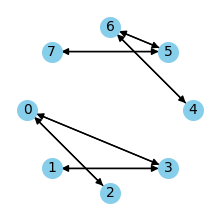

Paths V2: 1 paths


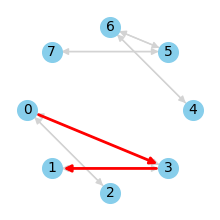

Hamiltonian paths V2: 0 paths
Hamiltonian cycles V2: 0 cycles


In [106]:
draw_graph(graph_matrix)
pathsV2 = find_all_paths_V2(graph_matrix, 0, 1)
pathsV2 = filter_unique_paths(pathsV2)
print(f"Paths V2: {len(pathsV2)} paths")
draw_solution(graph_matrix, pathsV2[:1])

Ham_pathV2 = find_hamiltonian_paths_V2(graph_matrix)
Ham_pathV2 = filter_unique_paths(Ham_pathV2)
print(f"Hamiltonian paths V2: {len(Ham_pathV2)} paths")
draw_solution(graph_matrix, Ham_pathV2[:1])

Ham_cyclesV2 = find_hamiltonian_cycles_V2(graph_matrix)
Ham_cyclesV2 = filter_unique_cycles(Ham_cyclesV2)
print(f"Hamiltonian cycles V2: {len(Ham_cyclesV2)} cycles")
draw_solution(graph_matrix, Ham_cyclesV2[:1], cycles=True)

In [107]:
def add_edges_and_find_paths(matrix, max_edges):
    if max_edges == 0:
        return find_hamiltonian_paths_V2(matrix)

    n = len(matrix)
    all_hamiltonian_paths = []

    for i in range(n):
        for j in range(i + 1, n):
            if matrix[i][j] == 0:
                # Create a copy of the matrix with an added edge
                new_matrix = [row.copy() for row in matrix]
                new_matrix[i][j] = 1
                new_matrix[j][i] = 1
                
                # Recursive call
                all_hamiltonian_paths.extend(add_edges_and_find_paths(new_matrix, max_edges - 1))
                
    return all_hamiltonian_paths

def find_hamiltonian_paths_incremental(matrix, max_added_edges):
    # First, try without adding any edges
    all_paths = find_hamiltonian_paths_V2(matrix)
    
    if all_paths:
        return all_paths

    for edges in range(1, max_added_edges + 1):
        all_paths = add_edges_and_find_paths(matrix, edges)
        
        if all_paths:  # If we found paths with the current number of added edges, break.
            break
    
    return all_paths

## Explaining the `add_edges_and_find_paths` Function

The `add_edges_and_find_paths` function is designed to explore the possible Hamiltonian paths in a given graph (represented as an adjacency matrix). If no paths are found, the function tries to add edges (up to `max_edges`) and checks again for Hamiltonian paths.

### Step-by-step Breakdown:

1. **Base Condition:**  
   If `max_edges` is 0, this means we've added the intended number of edges or we don't intend to add any in the first place. In this scenario, we directly check for a Hamiltonian path using the function `find_hamiltonian_paths_V2`.

2. **Adding Edges:**  
   If `max_edges` is greater than 0, there's still room to add more edges. The function then:
   - Iterates over all pairs of nodes.
   - For nodes that aren't currently connected:
     - Creates a new adjacency matrix with the added edge.
     - Recursively calls itself, decrementing `max_edges` by 1.

3. **Recursive Exploration:**  
   The recursive nature of this function allows us to explore different combinations of added edges. After the allowed number of edges are added, or all possible combinations are explored, the function checks for a Hamiltonian path.

### Example:

Let's consider a scenario where `max_edges` is 3:

- The initial call tries adding the 1st edge.
  - The recursive call at the next depth tries adding the 2nd edge.
    - Another level of recursion tries adding the 3rd edge.
      - Now, with `max_edges` being 0, the function checks if the graph has a Hamiltonian path with these added edges.

Every branch in this recursive exploration represents a distinct combination of edges added to the graph. 

The purpose of this comprehensive approach is to discover if it's possible to produce a Hamiltonian path with a certain number of additional edges.


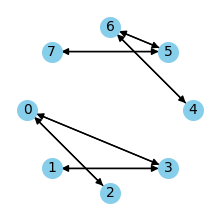

[[2, 0, 3, 1, 4, 6, 5, 7], [7, 5, 6, 4, 1, 3, 0, 2], [2, 0, 3, 1, 7, 5, 6, 4], [4, 6, 5, 7, 1, 3, 0, 2], [1, 3, 0, 2, 4, 6, 5, 7], [7, 5, 6, 4, 2, 0, 3, 1], [1, 3, 0, 2, 7, 5, 6, 4], [4, 6, 5, 7, 2, 0, 3, 1]]
Hamiltonian paths V2: 8 paths


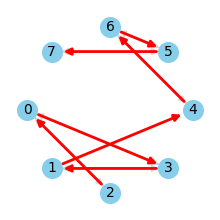

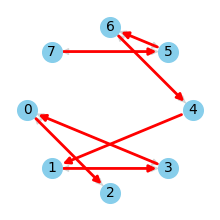

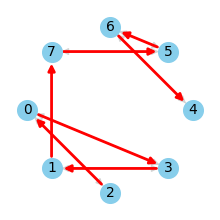

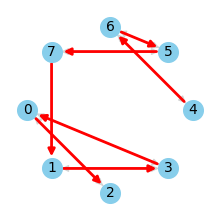

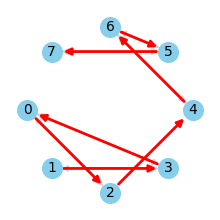

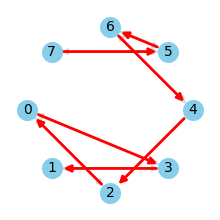

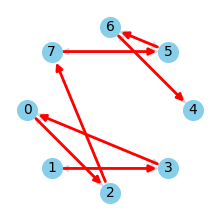

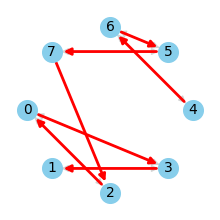

In [108]:
draw_graph(graph_matrix)
Ham_pathV2 = find_hamiltonian_paths_incremental(graph_matrix,2)
print(Ham_pathV2)
print(f"Hamiltonian paths V2: {len(Ham_pathV2)} paths")
draw_solution(graph_matrix, Ham_pathV2)